In [1]:
import numpy as np 
from scipy import linalg as linalg
import matplotlib.pyplot as plt 

In [1]:
def phi_calc(Xi,Xj,N_internal, Xj_neighbours):
    Ni = Xi.shape[0]
    Nj = Xj.shape[0]
    phi_mat = np.zeros((Ni,Nj))
    dphidx_mat = np.zeros((Ni,Nj))
    dphidz_mat = np.zeros((Ni,Nj))
    nablaphi_mat = np.zeros((Ni,Nj))

    #taking the ith point from Xi:
    for i in range(0,Ni):

        x = Xi[i,0]
        z = Xi[i,1]

        #finding the nearest point in Xj:
        nearest_point = np.argmin((Xj[0:N_internal,0]-x)**2 + (Xj[0:N_internal,1]-z)**2)
        #print(nearest_point)

        #the indices of points used for interpolation is therefore given by the neighbours of the nearest point
        #Xj_neighbours[nearest_point,:]

        #which have a coordinate set:
        X = Xj[Xj_neighbours[nearest_point,:],:]

        #fitting polynomial:
        poly_mat = np.zeros((5,5))
        for j in range(0,5):
            poly_mat[j,0] = 1
            poly_mat[j,1] = X[j,0]
            poly_mat[j,2] = X[j,1]
            poly_mat[j,3] = X[j,0]**2
            poly_mat[j,4] = X[j,1]**2


        #matrix of polynomial coefficients
        #print(i)
        
        coef_mat = np.linalg.inv(poly_mat)


        #calculating the value of the 9 polynomials at point (x,z)
        polynomial = np.zeros((1,5))
        for j in range(0,5):
            polynomial[:,j] = coef_mat[0,j] + coef_mat[1,j]*x + coef_mat[2,j]*z + coef_mat[3,j]*x*x + coef_mat[4,j]*z*z 

        #calculating value of derivatives at point (x,z)
        dpdx = np.zeros((1,5))
        for j in range(0,5):
            dpdx[:,j] = coef_mat[1,j] + 2*coef_mat[3,j]*x

        dpdz = np.zeros((1,5))
        for j in range(0,5):
            dpdz[:,j] = coef_mat[2,j] + 2*coef_mat[4,j]*z

        d2pdx2 = np.zeros((1,5))
        for j in range(0,5):
            d2pdx2[:,j] = 2*coef_mat[3,j]

        d2pdz2 = np.zeros((1,5))
        for j in range(0,5):
            d2pdx2[:,j] = 2*coef_mat[4,j]

        d2pdxdz = np.zeros((1,5))
        for j in range(0,5):
            d2pdxdz = 

        nabla = np.zeros((1,5))
        for j in range(0,5):
            nabla[:,j] = 2*coef_mat[3,j] + 2*coef_mat[4,j]

        #inserting vector of polynomial values back into the phi matrix:
        phi_mat[i,Xj_neighbours[nearest_point,:]] = polynomial
        dphidx_mat[i,Xj_neighbours[nearest_point,:]] = dpdx
        dphidz_mat[i,Xj_neighbours[nearest_point,:]] = dpdz
        nablaphi_mat[i,Xj_neighbours[nearest_point,:]] = nabla

    return phi_mat, dphidx_mat, dphidz_mat, nablaphi_mat



SyntaxError: invalid syntax (<ipython-input-1-aeb3e9e7d844>, line 65)

In [3]:
dx = 0.01
xx,zz = np.meshgrid(np.arange(0,1+dx,dx),np.arange(0,1+dx,dx))
#splitting into internal and external points:
xxi = xx[1:-1,1:-1]
zzi = zz[1:-1,1:-1]

nzi= xxi.shape[0]
nxi = xxi.shape[1]


Xji = np.stack([xxi.flatten(),zzi.flatten()],axis=1) 

Tpoint = 50
Xbc1 = np.stack([xx[1:-1,0:1].flatten(),zz[1:-1,0:1].flatten()],axis=1) 
Xbc2 = np.stack([xx[1:-1,-1:].flatten(),zz[1:-1,-1:].flatten()],axis=1) 
Xbc3 = np.stack([xx[-1:,1:-1].flatten(),zz[-1,1:-1].flatten()],axis=1) 
Xbc4 = np.stack([xx[0:1,1:Tpoint].flatten(),zz[0:1,1:Tpoint].flatten()],axis=1) 
Xbc5 = np.stack([xx[0:1,Tpoint:-1].flatten(),zz[0:1,Tpoint:-1].flatten()],axis=1) 


N_internal = Xji.shape[0]

Xj = np.concatenate([Xji,Xbc1,Xbc2,Xbc3,Xbc4,Xbc5])
Nj = Xj.shape[0]
bc1 = N_internal + Xbc1.shape[0]
bc2 = bc1 + Xbc2.shape[0]
bc3 = bc2 + Xbc3.shape[0]
bc4 = bc3 + Xbc4.shape[0]
bc5 = bc4 + Xbc5.shape[0]
plot = False
if plot:
    plt.plot(Xji[:,0],Xji[:,1],'.')
    plt.plot(Xbc1[:,0],Xbc1[:,1],'o')
    plt.plot(Xbc2[:,0],Xbc2[:,1],'o')
    plt.plot(Xbc3[:,0],Xbc3[:,1],'x')
    plt.plot(Xbc4[:,0],Xbc4[:,1],'x')
    plt.plot(Xbc5[:,0],Xbc5[:,1],'*')
    plt.plot(Xj[:,0],Xj[:,1],'.')

#calculating phi_mat:





In [4]:
#finding nnearest neighbours of each point in Xj
r2 = (Xj[:,0:1]-Xj[:,0:1].transpose())**2 + (Xj[:,1:2]-Xj[:,1:2].transpose())**2

Xj_neighbours = np.zeros((Xj.shape[0],5),dtype = int)

Xj_neighbours = np.zeros((Xj.shape[0],5),dtype = int)
for i in range(0,Xj.shape[0]):
    Xj_neighbours[i,:] = (np.argpartition(r2[:,i],5)[0:5])

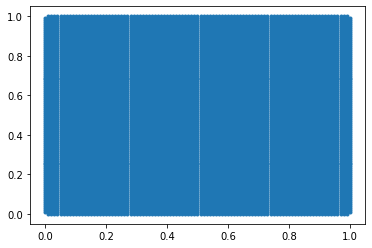

In [5]:
#transorming geometry of problem:
X_copy = Xj + 0
Xj[:,1] += 0*0.3*np.sin(X_copy[:,0])*X_copy[:,1]
plt.plot(Xj[:,0],Xj[:,1],'.')

In [6]:
phi_mat, dphidx_mat, dphidz_mat, nablaphi_mat = phi_calc(Xj,Xj,N_internal,Xj_neighbours)

In [7]:
#high res interpolation:
#dx = 0.01
xxhr, zzhr = np.meshgrid(np.arange(0,1+dx,dx),np.arange(0,1+dx,dx))
Xhr = np.stack([xxhr.flatten(),zzhr.flatten()],axis=1) 
nxhr = xxhr.shape[1]
nzhr = xxhr.shape[0]

phi_mathr, dphidx_mathr, dphidz_mathr, nablaphi_mathr = phi_calc(Xhr,Xj,N_internal,Xj_neighbours)

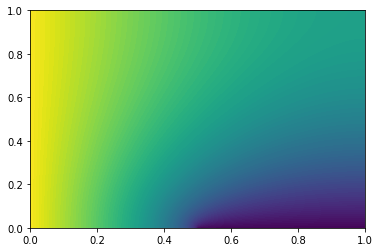

In [8]:
#solving laplace equation:

solver_mat = np.zeros((Nj,Nj))
bc_mat = np.zeros((Nj,1))


solver_mat[0:N_internal,0:Nj] = nablaphi_mat[0:N_internal,0:Nj]
solver_mat[N_internal:bc1,0:Nj] = phi_mat[N_internal:bc1,0:Nj]
solver_mat[bc1:bc2,0:Nj] = dphidx_mat[bc1:bc2,0:Nj]
solver_mat[bc2:bc3,0:Nj] = dphidz_mat[bc2:bc3,0:Nj]
solver_mat[bc3:bc4,0:Nj] = dphidz_mat[bc3:bc4,0:Nj]
solver_mat[bc4:bc5,0:Nj] = phi_mat[bc4:bc5,0:Nj]

#boundary conditions:
bc_mat[N_internal:bc1,0:1] = 1

sol = np.linalg.solve(solver_mat,bc_mat)

uhr = np.matmul(phi_mathr,sol).reshape((nzhr,nxhr))

plt.contourf(xxhr,zzhr,uhr,levels=100)



